# Sentiment analysis

Víctor Rodeño Sánchez

## Load dataset

In [38]:
# Import the pandas package, then use the "read_csv" function to get the labeled training data
import pandas as pd       
training = pd.read_csv("../input/word2vec-nlp-tutorial/labeledTrainData.tsv", header=0, \
                    delimiter="\t", quoting=3)
# Get target variable
Y = training['sentiment']
train = training.drop(["sentiment"], axis=1)
# train2 = pd.read_csv("../input/word2vec-nlp-tutorial/unlabeledTrainData.tsv", header=0, \
#                     delimiter="\t", quoting=3)
print(train.shape)
# print(train2.shape)
# print(train2.head())
train.head()

(25000, 2)


,id,review
0,"""5814_8""","""With all this stuff going down at the moment ..."
1,"""2381_9""","""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""","""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""","""It must be assumed that those who praised thi..."
4,"""9495_8""","""Superbly trashy and wondrously unpretentious ..."


## Import neccesary packages

In [39]:
# Import function BeautifulSoup to clean text of HTML tags
from bs4 import BeautifulSoup 
# Import re to do regular expresions 
import re
import nltk
#nltk.download()
# Import list of stopwords from library NLTK
from nltk.corpus import stopwords # Import the stop word list
# Import Lemmatizer from NLTK
from nltk.stem import WordNetLemmatizer

import numpy as np

Load stopwords list and remove whose we do not want to use. 

In [40]:
# 4. In Python, searching a set is much faster than searching a list, so convert the stop words to a set
stopwordsList = set(stopwords.words("english"))
print(stopwordsList)
# We remove negation words in list of stopwords
noStopwords = ["not","don't",'aren','don','ain',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
               'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't",
            "won't", 'wouldn', "wouldn't"]
for noStopword in noStopwords:
    stopwordsList.remove(noStopword)
print(stopwordsList)

{'own', 'between', 'nor', 'as', 'shan', 'she', 've', 'why', 'shouldn', "aren't", 'down', 'up', 'very', 'd', 'only', 'yours', 'while', "you're", 'few', 'don', 'your', 'against', 'yourself', 'under', 'so', "didn't", 'more', 'aren', 'there', 'will', "needn't", 'theirs', 'do', 'an', 'be', 'too', 'he', 'into', 'can', 'of', 'about', 'haven', 'before', 'in', "shan't", 'has', "isn't", 'the', "won't", 'ours', 'all', 'being', "mustn't", 'had', "should've", 'off', "couldn't", 'a', 'or', 'm', 'needn', 'whom', 'hers', 'should', 'both', 'until', 'during', 'o', "haven't", 'on', "doesn't", "she's", 's', "wasn't", 'who', 'and', 'here', 'than', 'isn', 'couldn', 'at', 'same', "weren't", 'such', 'again', 'over', 'its', 'them', 'other', 'her', "it's", 'which', 'me', 'itself', 'each', "shouldn't", 'wasn', 'herself', 'you', 'were', 'does', 'y', 'doesn', 'wouldn', 'because', 'my', 'with', 'himself', "you'll", 'hadn', 'have', 'won', 'didn', 'then', 'his', 'how', 'what', 'any', 'where', 'those', 'just', 'weren'

Function to lemmatize reviews

In [41]:
lemmatizer = WordNetLemmatizer()
#function that receive a list of words and do lemmatizing/stemming(porter/lancaster):
def lemmaStemText(wordsList):
    # Lemmatizer
    text = [lemmatizer.lemmatize(token.lower()) for token in wordsList]# eighties->eight or messages->message or drugs->drug
    text = [lemmatizer.lemmatize(token.lower(), "v") for token in text]# going-> go or started->start or watching->watch
    # PorterStemmer
    #text = [stemmerP.stem(token) for token in wordsList]# mejor porter que stemmer
    #LancasterStemmer
    #text = [stemmerL.stem(token) for token in wordsList]
    return text
print(lemmatizer.lemmatize("wasn`t"))

wasn`t


In [42]:
# Create a function using re library to change negation abbreviate forms to standar
import re
re_negation = re.compile("n't ")
def Negation(sent):
    sent = re_negation.sub(" not ", sent)
    return sent
Negation("I aren't ")

'I are not '

Create a function to clean text of a review using previous functions

In [43]:
def review_to_words( raw_review ):
    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    # 2. Remove non-letters non numbers   
    letters_numbers_only = re.sub("[^a-zA-Z_0-9]", " ",Negation(review_text)) 
    
    # 3. Convert to lower case and split into individual words
    words = np.char.lower(letters_numbers_only.split())#.split()                             
  
    # 4. Remove stop words
    meaningful_words = [w for w in words if not w in stopwordsList]   
    # 5. Apply lemmatization function
    lemmWords = lemmaStemText(meaningful_words)
    # 6. Join the words back into one string separated by space, and return the result.
    return( " ".join( lemmWords ))   

In [44]:
# Clean first review
clean_review = review_to_words( train["review"][0] )
# Print original review, sentiment and cleaned review
print('original review: ',train["review"][0])
print('original review: ',Y[0])
print('cleaned review:',clean_review) 

original review:  "With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit w

Clean all reviews 

In [45]:
# Get the reviews based on the dataframe column size
reviews = train['review'][0:25000]
# Initialize an empty list to hold the clean reviews
clean_train_reviews = []

# Loop over each review and clean it  
for i in reviews:
    # Call our function for each one, and add the result to the list of clean reviews
    clean_train_reviews.append(review_to_words(i))

## Vectorization

In [46]:
# Import tf-idf encoded from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer
# Define some hiperparameters of encoded
vectorizer = TfidfVectorizer(max_features=20000, min_df = 2, ngram_range = (1,2))
# Create a vocabulary of words
tfidf = vectorizer.fit_transform(clean_train_reviews)
# Get encoded train reviews
train_data_features = tfidf#.toarray()
print(train_data_features.shape)

(25000, 20000)


## Model

We check if training dataset is balanced

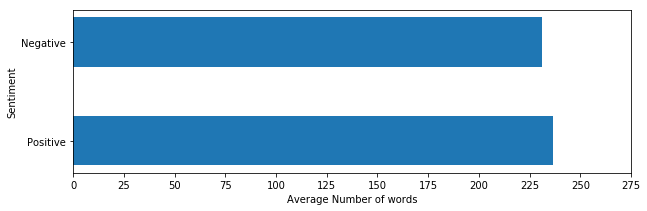

In [55]:
# Get mean of positive and negative reviews
avg_pos_words = training[training.sentiment==1].review.apply(lambda x: len(x.split())).mean()
avg_neg_words = training[training.sentiment==0].review.apply(lambda x: len(x.split())).mean()

import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.barh(['Positive', 'Negative'], [avg_pos_words, avg_neg_words], height=0.5)
plt.xticks(np.arange(0, 300, 25))
plt.xlabel('Average Number of words')
plt.ylabel('Sentiment')
plt.show()

In [ ]:
# Import logistic regression model from sklearn 
from sklearn.linear_model import LogisticRegression
# Define model and train using data
model = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial').fit(train_data_features, Y)

Now we predict sentiment of test dataset

In [ ]:
# Read the test data
test = pd.read_csv("../input/word2vec-nlp-tutorial/testData.tsv", header=0, delimiter="\t", \
                   quoting=3 )

# Verify that there are 25,000 rows and 2 columns
print(test.shape)

# Create an empty list and append the clean reviews one by one
num_reviews = len(test["review"])
clean_test_reviews = [] 

# Get encoded test reviews
print("Cleaning and parsing the test set movie reviews...\n")
for i in range(0,num_reviews):
    clean_review = review_to_words( test["review"][i] )
    clean_test_reviews.append( clean_review )

# Get a tf-idf encoded for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_reviews)
#test_data_features = test_data_features.toarray()

# Use the logistic regression model to make sentiment label predictions
result = model.predict(test_data_features)

# Copy the results to a pandas dataframe with an "id" column and a "sentiment" column
output = pd.DataFrame( data={"id":test["id"], "sentiment":result} )

Ultimately we build a dataframe to submission

In [ ]:
# Use pandas to write the comma-separated output file
output.to_csv("submission.csv", index=False, quoting=3 )

# This is not part of final solution 

## Compare models

In [47]:
# We split train dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data_features, Y, test_size=0.2, random_state=42)

In [48]:
# We train two models: random forest and logistic regression
from sklearn.ensemble import RandomForestClassifier
# Initialize a Random Forest classifier with 500 trees
forest = RandomForestClassifier(n_estimators = 500, max_depth = None, min_samples_split=2, min_samples_leaf =1,
                                bootstrap = True, random_state=0)
# Train the model
forest = forest.fit(X_train, y_train)
# Print score of model(using test dataset)
print(forest.score(X_test, y_test))

0.8676


In [49]:
# Initialize a logistic regression model 
logistic = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial')
# Train the model
logistic = logistic.fit(X_train, y_train)
# Print score of model(using test dataset)
print(logistic.score(X_test, y_test))

0.8968


In [50]:
y_pred_forest  = forest.predict(X_test)
y_pred_logistic  = logistic.predict(X_test)

In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix_forest = confusion_matrix(y_test, y_pred_forest, labels=[1,0])
confusion_matrix_forest

array([[2196,  323],
       [ 339, 2142]])

Text(0.5, 1.0, 'Confusion matrix Random Forest')

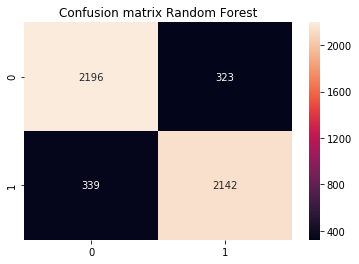

In [52]:
import seaborn as sns
# plot the confusion matrix
ax = plt.axes()
sns.heatmap(confusion_matrix_forest, annot=True, fmt="d")
ax.set_title('Confusion matrix Random Forest')

In [53]:
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic, labels=[1,0])
confusion_matrix_logistic


array([[2290,  229],
       [ 287, 2194]])

[]

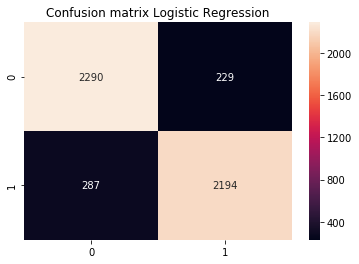

In [54]:
# plot the confusion matrix
ax = plt.axes()
sns.heatmap(confusion_matrix_logistic, annot=True, fmt="d")
ax.set_title('Confusion matrix Logistic Regression')


### Functions we do not use in final solution but they have been considered getting worst results:

In [ ]:
import numpy as np


#!pip install profanity-check
#!$ pip install profanity-check

# function modify names of people in text
# from nltk.corpus import words
# nltk.download('names')
# NamesList = set(nltk.corpus.names.words())
def modifyNamesText(wordsList):
    for word in wordsList:
        if word in NamesList:
            wordsList = np.char.replace(wordsList, word, 'character')
    return wordsList 

# function modify numbers in text
def modifyNumbersText(wordsList):
    for word in wordsList:
        if word.isnumeric():
            wordsList = np.char.replace(wordsList, word, 'number')  
    return wordsList 

# function detect and modify insults in text
# !pip install profanity-check
# from profanity_check import predict, predict_prob
# commonInsults = set(['stupid', 'suck', 'idiot'])# ass, dick, 'crap'
def modifyInsultsText(wordsList):
    for word in wordsList:
        if predict([word])[0] == 1 and word not in commonInsults:
            wordsList = np.char.replace(wordsList, word, 'insult')
    return wordsList 

In [ ]:
# Function to correct bad written words
# !pip install autocorrect
# from autocorrect import Speller
# spell = Speller()
# nltk.download('wordnet')
# from nltk.corpus import wordnet
# from nltk.corpus import words

# Take a dictionary of words
# dictionary1 = set(words.words())

def correctListBadWrittenWords(rewiewText):
    # Lista donde se guardaran las palabras(corregidas si estaban mal escritas)
    wordsReviewList = []
    # Recorremos cada palabra de la lista de strings
    for word in rewiewText:
        word = word.lower()
        # Comprobamos si esta palabra esta en el diccionario
        if not word in dictionary1:
            correctedWord = spell(word)
            rewiewText = np.char.replace(rewiewText, word, correctedWord)
    return rewiewText

# Otra libreria para corregir palabras es pyspellchecker

In [ ]:
# functions use regular expressions to modify elements in text(no words)
import re
re_negation = re.compile("n't ")
re_exclamation = re.compile(r"! ")
re_upper = re.compile(" A-Z ")
def Negation(sent):
    sent = re_negation.sub(" not ", sent)
    return sent
Negation("I aren't ")
def Exclamation(sent):
    sent = re_negation.sub(" ! ", sent)
    return sent
def Up(reviewText):
    for word in  reviewText.split(' '):
        if word.isupper() and len(word)>1:
            reviewText = reviewText + ' '+'upper'
    return reviewText     

In [ ]:
# Testing about get synonyms and antonyms
from nltk.corpus import wordnet
syn=wordnet.synsets('love')
print(syn)
print(syn[0].definition())
print(syn[0].examples())
synonyms=[]
for syn in wordnet.synsets('love'):
    for lemma in syn.lemmas():
            synonyms.append(lemma.name())
print('synonyms', synonyms)
antonyms=[]
for syn in wordnet.synsets('cold'):
    for l in syn.lemmas():
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())
print('antonyms:',antonyms)